In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.rcParams['font.family'] = 'AppleGothic'

In [4]:
df=pd.read_excel('/Users/bomi/bigcon_personal/dataset/eval data/2020 빅콘테스트 데이터분석분야-챔피언리그_2020년 6월 판매실적예측데이터(평가데이터).xlsx',header=1)

In [22]:
df.head()

,broadcast,exp_min,m_code,p_code,p_name,p_group,unit_price,total_price
0,2020-06-01 06:20:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
1,2020-06-01 06:40:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
2,2020-06-01 07:00:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
3,2020-06-01 07:20:00,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN
4,2020-06-01 07:40:00,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN


In [6]:
df.columns=['broadcast','exp_min','m_code','p_code','p_name','p_group','unit_price','total_price']

In [23]:
df.head()

,broadcast,exp_min,m_code,p_code,p_name,p_group,unit_price,total_price
0,2020-06-01 06:20:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
1,2020-06-01 06:40:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
2,2020-06-01 07:00:00,20.0,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
3,2020-06-01 07:20:00,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN
4,2020-06-01 07:40:00,20.0,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN


In [9]:
rec=pd.read_excel('/Users/bomi/bigcon_personal/base_line.xlsx')

In [14]:
rec.head(2)

,broadcast,exp_min,m_code,p_code,p_name,p_group,unit_price,total_price,sales,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,YEAR_DAY,DAY_NAME,DAY_NUM,code,no
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,53,2019,1,1,6,0,0,2019-01-01,Tuesday,2,0,0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,110,2019,1,1,6,0,0,2019-01-01,Tuesday,2,0,1


In [25]:
#6월만 자름
june=rec[rec['MONTH']==6]
june.head(2)

,broadcast,exp_min,m_code,p_code,p_name,p_group,unit_price,total_price,sales,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,YEAR_DAY,DAY_NAME,DAY_NUM,code,no
14926,2019-06-01 06:00:00,20.0,100219,200767,썸덱스 쉬룰 데일리 백팩 5종 세트,잡화,59000,11954000,203,2019,6,1,6,0,0,2019-06-01,Saturday,6,2889,14926
14927,2019-06-01 06:20:00,20.0,100219,200767,썸덱스 쉬룰 데일리 백팩 5종 세트,잡화,59000,15705000,266,2019,6,1,6,20,0,2019-06-01,Saturday,6,2889,14927


## 2020년 6월 상품군별 방송횟수

In [8]:
df.p_group.value_counts()

가전      489
농수축     424
생활용품    348
속옷      329
잡화      277
주방      272
무형      175
이미용     167
의류      161
가구      159
침구       72
건강기능     18
Name: p_group, dtype: int64

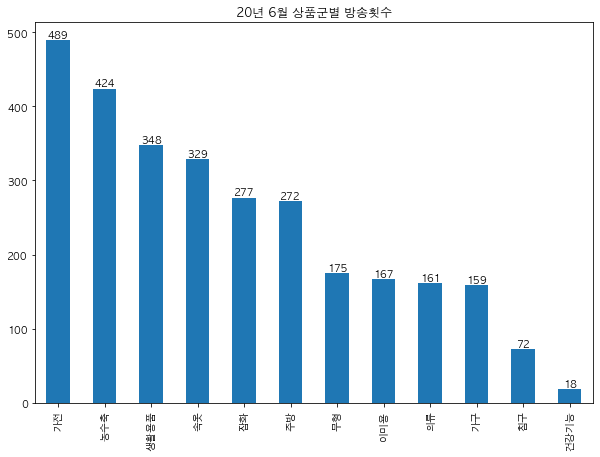

In [37]:
df.p_group.value_counts().plot(kind='bar',figsize=(10,7))
plt.title('20년 6월 상품군별 방송횟수')
for i,v in enumerate(range(len(df.p_group.value_counts().index))):
    plt.text(v,df.p_group.value_counts().values[i],df.p_group.value_counts().values[i],
             fontsize = 10, 
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom'
            )

## 2019년 6월 상품군별 방송횟수

In [15]:
june.p_group.value_counts()

주방      486
의류      448
가전      427
속옷      375
잡화      293
가구      236
농수축     199
침구      162
생활용품     87
건강기능     87
이미용      60
Name: p_group, dtype: int64

In [27]:
june.p_group.value_counts().values

array([486, 448, 427, 375, 293, 236, 199, 162,  87,  87,  60])

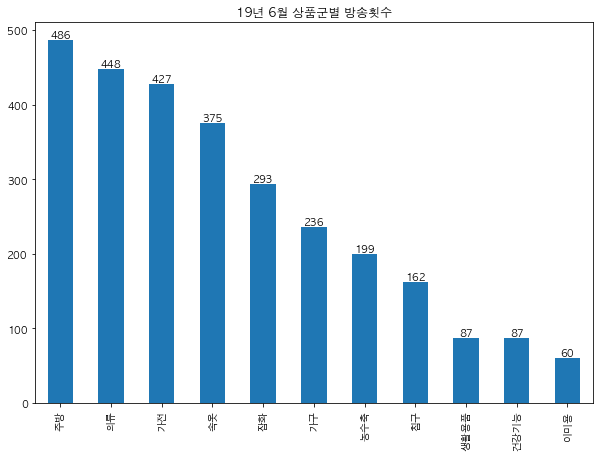

In [35]:
june.p_group.value_counts().plot(kind='bar',figsize=(10,7))
plt.title('19년 6월 상품군별 방송횟수')
for i,v in enumerate(range(len(june.p_group.value_counts().index))):
    plt.text(v,june.p_group.value_counts().values[i],june.p_group.value_counts().values[i],
             fontsize = 10, 
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom'
            )

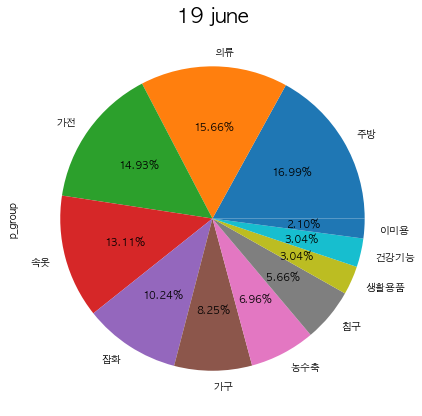

Text(0.5, 1.0, '20 june')

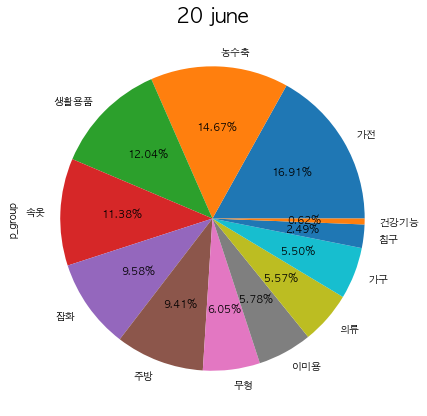

In [52]:

june.p_group.value_counts().plot(kind='pie',figsize=(10,7),autopct='%1.2f%%')
plt.title('19 june',fontsize=20)
plt.show()
df.p_group.value_counts().plot(kind='pie',figsize=(10,7),autopct='%1.2f%%')
plt.title('20 june',fontsize=20)

In [61]:
df.groupby('p_group').mean()

,exp_min,m_code,p_code,unit_price,total_price
p_group,,,,,
가구,20.000000,100239.415094,200814.830189,7.713774e+05,NaN
가전,20.000000,100295.858896,200989.576687,1.368417e+06,NaN
건강기능,20.000000,100455.000000,201366.000000,7.101667e+04,NaN
농수축,18.941071,100461.650943,201391.544811,4.040236e+04,NaN
무형,23.998160,100513.925714,201555.617143,0.000000e+00,NaN
생활용품,19.979718,100420.008621,201286.301724,1.682724e+05,NaN
속옷,18.504944,100345.860182,201099.270517,7.373009e+04,NaN
의류,19.757192,100483.708075,201474.608696,5.183478e+04,NaN
이미용,19.899202,100480.101796,201453.089820,4.854431e+04,NaN


In [63]:
df3=pd.read_csv('/Users/bomi/Downloads/소매업태별_판매액지수_2015100.0__20200923142405.csv',encoding='CP949')

In [64]:
df3

,업태별,2019. 01,2019. 01.1,2019. 01.2,2019. 02,2019. 02.1,2019. 02.2,2019. 03,2019. 03.1,2019. 03.2,...,2020. 03.2,2020. 04,2020. 04.1,2020. 04.2,2020. 05,2020. 05.1,2020. 05.2,2020. 06 p),2020. 06 p).1,2020. 06 p).2
0,업태별,경상지수,불변지수,계절조정지수,경상지수,불변지수,계절조정지수,경상지수,불변지수,계절조정지수,...,계절조정지수,경상지수,불변지수,계절조정지수,경상지수,불변지수,계절조정지수,경상지수,불변지수,계절조정지수
1,총지수,111.7,109.8,110.9,101.9,99.8,111.1,118.1,116.0,113.9,...,104.8,110.8,108.9,110.4,120.4,118.6,115.5,118.8,116.9,118.2
2,체인 슈퍼마켓,118.2,110.0,-,111.0,102.7,-,110.0,102.7,-,...,-,120.1,109.5,-,130.9,119.2,-,122.1,111.5,-
3,일반 슈퍼마켓 및 잡화점,93.1,88.0,-,86.9,81.5,-,93.2,88.0,-,...,-,95.8,88.6,-,105.6,97.5,-,99.5,92.1,-
4,승용차 소매점,98.8,99.6,-,87.7,88.5,-,115.5,116.8,-,...,-,142.6,145.0,-,144.9,147.1,-,168.6,171.3,-
5,연료 소매점,98.4,103.8,-,92.3,97.9,-,101.1,105.3,-,...,-,89.2,99.7,-,88.4,105.5,-,92.0,104.3,-
6,가전·컴퓨터·통신기기 소매점,88.4,89.8,-,80.4,82.2,-,103.9,106.4,-,...,-,85.1,87.4,-,95.7,98.5,-,96.7,99.7,-
7,의복·신발·가방 소매점,97.7,94.3,-,91.8,87.7,-,111.4,106.8,-,...,-,75.8,73.0,-,102.0,97.0,-,81.3,77.5,-
8,음식·가정· 문화상품 소매점,92.0,85.3,-,85.3,78.4,-,91.8,85.2,-,...,-,84.1,76.9,-,94.1,85.8,-,86.4,79.1,-
9,의약품·화장품·기타상품 소매점,102.8,104.0,-,95.6,96.3,-,106.6,107.2,-,...,-,94.2,92.8,-,100.7,99.2,-,100.2,98.6,-


In [72]:
print(df3.iloc[-1,1],df3.iloc[-1,4],df3.iloc[-1,52])


142.2 116.1 143.0


In [82]:
homelist=[]
for i in range(1,55,3):
    homelist.append(float(df3.iloc[-1,i]))

In [83]:
import matplotlib.pyplot as plt

In [88]:
homelist

[142.2,
 116.1,
 137.0,
 133.5,
 137.1,
 125.8,
 127.2,
 123.1,
 127.6,
 143.0,
 142.0,
 141.8,
 136.2,
 134.4,
 151.2,
 137.8,
 144.7,
 143.0]

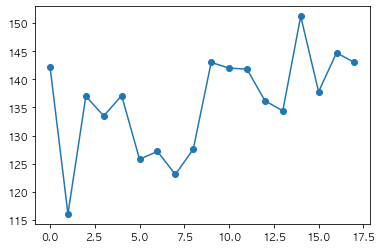

In [85]:
plt.plot(range(18),homelist,marker='o')

([<matplotlib.axis.XTick at 0x7f908c268310>,
 <a list of 12 Text xticklabel objects>)

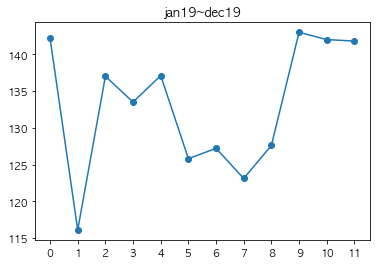

In [98]:
plt.plot(range(12),homelist[:12],marker='o')
plt.title('jan19~dec19')
plt.xticks(range(12))

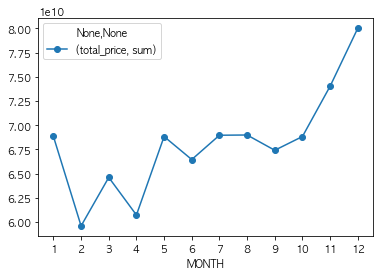

In [107]:
rec.groupby(['MONTH']).agg({'total_price':['sum']}).plot(marker='o',xticks=(range(1,13)))


In [102]:
sobi=[109,109,110,110,109,108,107,105,106,108,109,109]

In [103]:
len(sobi)

12

([<matplotlib.axis.XTick at 0x7f908df78f90>,
 <a list of 12 Text xticklabel objects>)

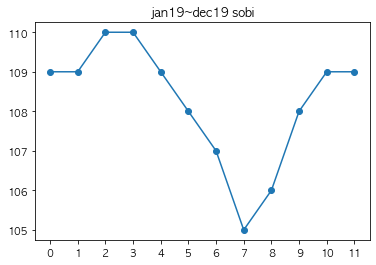

In [104]:
plt.plot(range(12),sobi,marker='o')
plt.title('jan19~dec19 sobi')
plt.xticks(range(12))